**Instruções:**  

- Justifique seu raciocínio e escreva respostas completas. Os resultados de questões anteriores podem ser usados nas questões seguintes. 

- Explique seu código e comente os gráficos: um gráfico sem referência no texto está “perdido”.

**(Q1) Matrizes Gaussianas:** Uma matriz gaussiana tem todas as entradas $A_{ij}$ independentes e distribuídas segundo uma normal padrão, ou seja, $A_{ij} \sim N(0,1).$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv

**(a) Distribuição das normas:** Faça um histograma da $\Vert \cdot \Vert_2$ das colunas de uma matriz gaussiana $A$, $m \times n$. Use vários valores de $m$, e comente o que você observa.

In [ ]:
n = 100

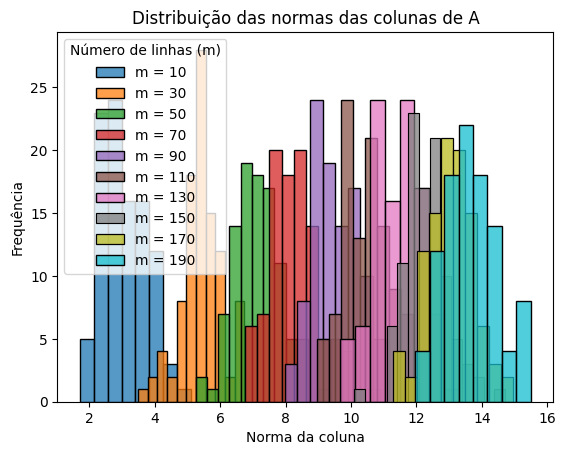

In [ ]:
for m in range(10, 200, 20):
    A = np.random.normal(0, 1, size=(m, n))
    norm_list = [np.linalg.norm(A[:, i]) for i in range(n)]
    sns.histplot(norm_list, label=f"m = {m}", legend=True)


plt.legend(title="Número de linhas (m)")
plt.xlabel("Norma da coluna")
plt.ylabel("Frequência")
plt.title("Distribuição das normas das colunas de A")
plt.show()


É possível notar uma distribuição aparentemente normal entre a norma das colunas de uma matriz $A$, e também, percebe-se que o valor das normas aumenta conforme o $m$ aumenta, o que é esperado, tendo em vista que há mais elementos no vetor.

**(b) Produtos internos:** Agora, fixe $m = 100$ e faça o histograma do produto interno $⟨A_i,A_j⟩$ entre colunas de uma matriz gaussiana $A$. Exclua os casos $i = j$ e use $n = 100,200, 500, 1000$. O que acontece? Qual parece ser a distribuição para $n \rightarrow \infty$?

In [ ]:
m = 100

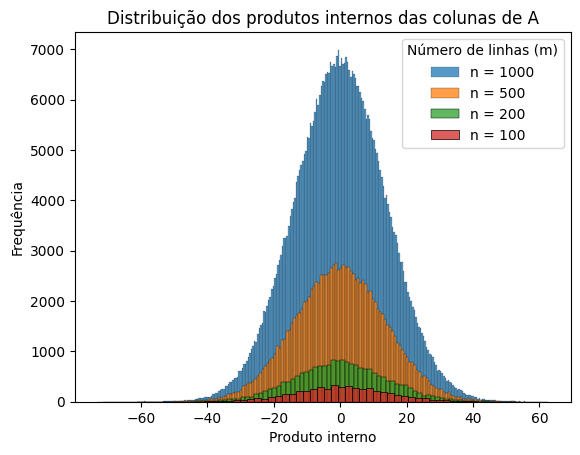

In [ ]:
for n in [1000, 500, 200, 100]:
    A = np.random.normal(0, 1, size=(m, n))
    inner_list = [np.inner(A[:, i], A[:, j]) for i in range(n) for j in range(i+1, n)]
    sns.histplot(inner_list, label=f"n = {n}", legend=True)


plt.legend(title="Número de linhas (m)")
plt.xlabel("Produto interno")
plt.ylabel("Frequência")
plt.title("Distribuição dos produtos internos das colunas de A")
plt.show()


Percebe-se que o valor dos produtos internos entre as colunas possui uma distribuição normal, aparentemente com média (0)

**(c) A distribuição do máximo:** Queremos ver quão “não ortogonal” é a matriz $A$. Para isto, vamos estudar o máximo de $\frac{\langle A_i, A_j \rangle}{\Vert A_i \Vert \Vert A_j \Vert}$ entre colunas distintas de uma matriz gaussiana $A$. Para isto, gere $K = 1000$ matrizes gaussianas $A_k$ de ordem $100 \times 300$, calcule o máximo indicado acima, e faça um histograma dos $K$ valores obtidos.

**(d) Complexidade computacional:** Qual a complexidade de calcular o máximo acima? Qual valor de $K$ você acha que seria bom para ter uma boa estimativa do máximo esperado?

**(e) A distribuição do máximo - parte 2** Escolha valores de $K$ correspondentes e faça histogramas e comente os resultados para os seguintes pares de $(m,n): (100,100), (100,300), (200,200), (200,600), (500,500), (500,1500), (1000,1000), (1000,3000)$